### Pytorch Workflow

In [1]:
what_were_covering = {
    1:'data (_prepare and load)',
    2:'build model',
    3:'fitting the model to data(training)',
    4:'making predictions and evaluating a model (infrence)',
    5:'saving and loading a model',
    6:"putting it all together"   }
what_were_covering

{1: 'data (_prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model (infrence)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all pytorchs building blocks for neural networks
import numpy as np
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.3.0.dev20240218+cu121'

## Data preparing and loading
Data can be anyting in ... machine learning
* excel spredsheet
* image of any kind
* vidio
* audio
* DNA
* Text

In [3]:
#create known parameters
weight = 0.7
bias = 0.3

#create 
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets

In [5]:
# create a train/test split
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split] ,y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [6]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

### Data Visualization

In [7]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))

    # plot training data in blue
    plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')


    # plot test data in green
    plt.scatter(test_data,test_labels,c='g',s=4,label='Test data')

    # are there predictions?
    if predictions is not None:
        # Plot predicitions if they exists
        plt.scatter(test_data,predictions,c='r',s=4,label='Predicitions')

    # Show the legend
    plt.legend(prop={'size':14});       

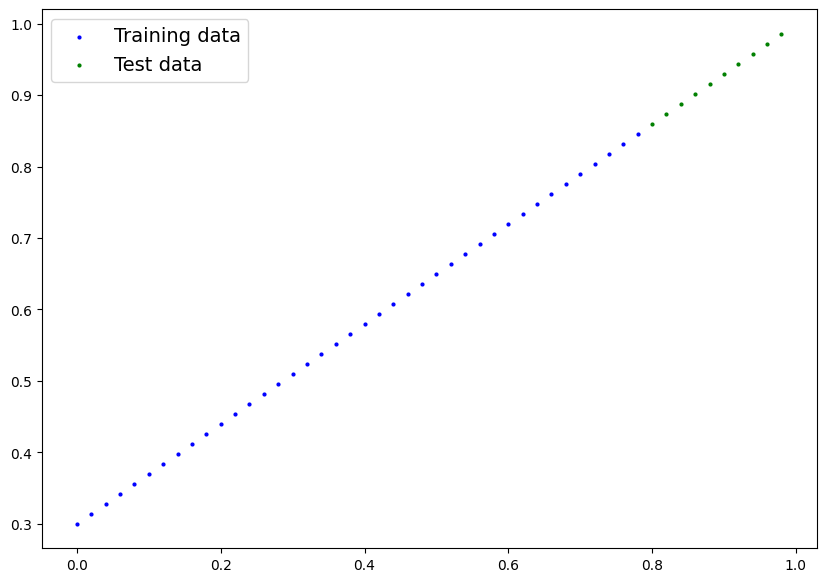

In [8]:
plot_predictions()

### Build Model


In [9]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):# <- almost everything in pytorch inherits fron nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,# <- start with a random weight and try to adjust it to the ideal weight
                                               requires_grad=True,# <- can this Prarameter be updated via gradient descent?
                                               dtype=torch.float))# <- Pytorch loves the datatype torch.float32
        
        self.bias = nn.Parameter(torch.randn(1,# <- start with random bias and try to adjust it to the ideal bias
                                             requires_grad=True,# <- can this parameter be updated via gradient descent?
                                            dtype=torch.float))# <- Pytorch loves the datatype torch.float32
        
        # Forward method to define the computation in the model
    def forward(self,x:torch.Tensor) -> torch.Tensor: # 'x' is the input data
        return self.weights * x + self.bias # this is the linear regression formula    

### Pytorch model building essentials
* torch.nn - contains all of the building for computational graph(a neural network can be considerd a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural networks module,if you subclass it, you should overwrite forward() 
* torch.optim - this where the optimizer in Pytoch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(),this defines what happens in the forward function                

### Checking the contents of our Pytorch model
Now we've created a model,lets see what's inside....
So we can check our model parameter or what"s inside our model using **.parameters()**

In [10]:
# create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

## check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight,bias

(0.7, 0.3)

### Making prediction using torch.infrence_mode()

In [13]:
# make predicition with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# can also do something similar with torch.no_grade()
# with torch.no_grad():
#     y_preds = model_0(X_test)
y_preds    

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

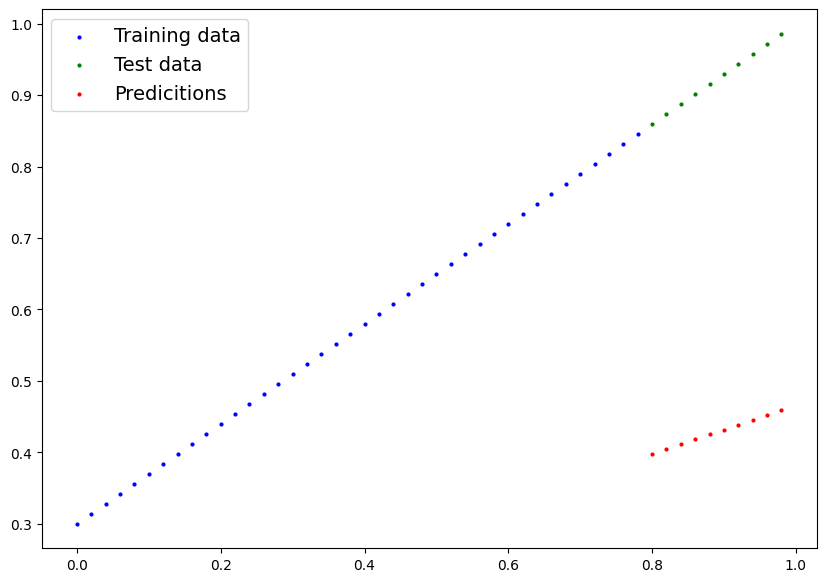

In [15]:
plot_predictions(predictions=y_preds)

In [16]:
# setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01) 

### Building a training (and testing loop) loop in PyTorch:

A couple of things we needed in the training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's 'forward()' functions) - also called Forward Propagation
2. Calculate the loss (compare forward pass predicition to ground truth labels)
3. Optimizer zero grad
4. Loss Backward - move backwards through the network to calculate the gradients of each  of the parameters of our model with respect to the loss (**BackPropagation**)
5. Optimizer step - use the optimizer to adjust our models parameters to try and improve the loss (**gradient descent**)

In [17]:
# An epoch is one loop through the data...
epochs  = 200

#tracking diffrent values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0 Loop through the data
for epoch in range(epochs):
    #set the model to training mode
    model_0.train() # train mode in pytorch set all parameters that requires gradients to require gradients

    #1. Forward pass
    y_pred = model_0(X_train)

    #2. Calculate the loss
    loss = loss_fn(y_pred,y_train)
    # print(f'Loss = {loss}')

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    #5. step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will acculumagte through the loop so... we have to zero them above in step 3 for the next iteration of the loop 
    
    model_0.eval() # turns off gradient tracking (turns off diffrent settings in the model not needed for evaluation/testing) 

    with torch.inference_mode():
        #1. Do the forward pass
        test_pred = model_0(X_test)

        #2. calculate the loss
        test_loss = loss_fn(test_pred,y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f'Epoch:{epoch} | Loss: {loss} | Test_loss: {test_loss}')

    #print out model stat_dict()
    # print(model_0.state_dict())

Epoch:0 | Loss: 0.31288138031959534 | Test_loss: 0.48106518387794495
Epoch:10 | Loss: 0.1976713240146637 | Test_loss: 0.3463551998138428
Epoch:20 | Loss: 0.08908725529909134 | Test_loss: 0.21729660034179688
Epoch:30 | Loss: 0.053148526698350906 | Test_loss: 0.14464017748832703
Epoch:40 | Loss: 0.04543796554207802 | Test_loss: 0.11360953003168106
Epoch:50 | Loss: 0.04167863354086876 | Test_loss: 0.09919948130846024
Epoch:60 | Loss: 0.03818932920694351 | Test_loss: 0.08886633068323135
Epoch:70 | Loss: 0.03476089984178543 | Test_loss: 0.0805937647819519
Epoch:80 | Loss: 0.03132382780313492 | Test_loss: 0.07232122868299484
Epoch:90 | Loss: 0.02788739837706089 | Test_loss: 0.06473556160926819
Epoch:100 | Loss: 0.024458957836031914 | Test_loss: 0.05646304413676262
Epoch:110 | Loss: 0.021020207554101944 | Test_loss: 0.04819049686193466
Epoch:120 | Loss: 0.01758546568453312 | Test_loss: 0.04060482233762741
Epoch:130 | Loss: 0.014155393466353416 | Test_loss: 0.03233227878808975
Epoch:140 | Loss

In [18]:
torch.tensor(loss_values).cpu().numpy()

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

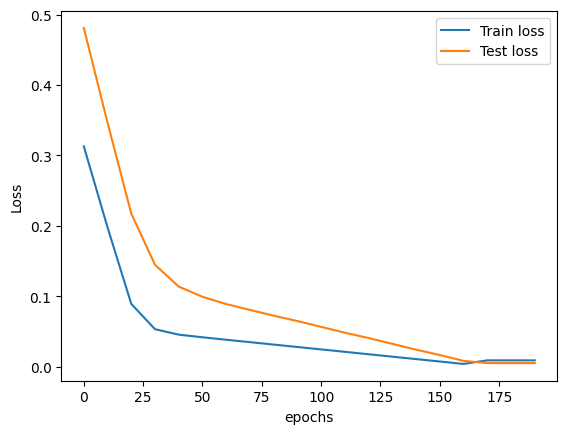

In [19]:
# plot the loss curve
plt.plot(epoch_count,torch.tensor(loss_values).numpy(),label='Train loss')
plt.plot(epoch_count,torch.tensor(test_loss_values).numpy(),label="Test loss")
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend();

In [20]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
y_preds_new    

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [21]:
# epochs = 1

# for epoch in epochs:
#     model_0.train()
#     y_pred = model_0(X_train)
#     loss = loss_fn(y_pred,y_train)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     model_0.eval()

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
weight,bias

(0.7, 0.3)

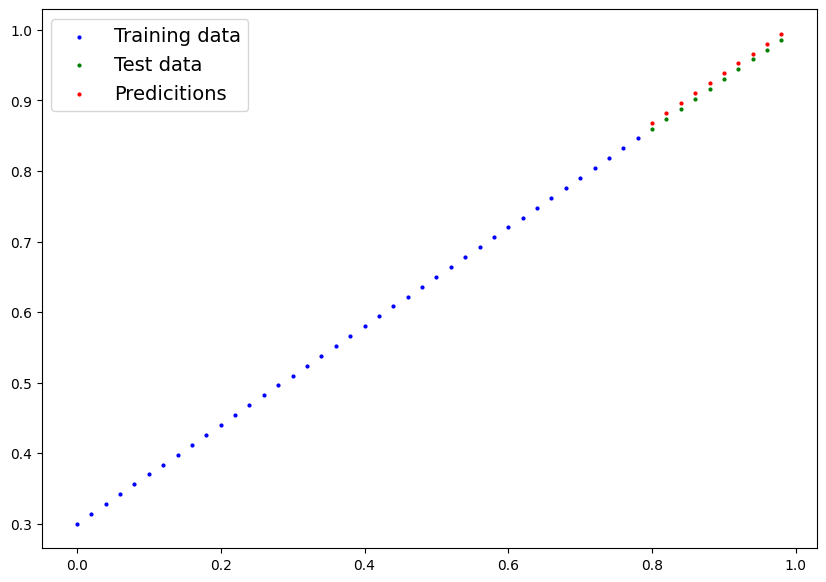

In [24]:
plot_predictions(predictions=y_preds_new)

### Saving a model in PyTorch
Three main method for saving and loading the models in PyTorch
1. torch.save() - allows you save a PyTorch object in pythons pickle format
2. torch.load() - allows you load a saved PyTorch object
3. torch.nn.Module.load_state_dict() - this allows to load a models saved state dictionary

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
# saving our Pytorch model
from pathlib import Path

#1.create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True) 

#2. Create mdoel save path
MODEL_NAME = 'model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

#3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models/model_0.pth


In [27]:
!ls -l models

total 4
-rwxrwxrwx 1 khushwant khushwant 1496 Feb 27 02:07 model_0.pth


In [28]:
## Loading a pytoch model
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [30]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [31]:
# make some predition with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [32]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together

In [33]:
# importing pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.0.dev20240218+cu121'

In [34]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [35]:
!nvidia-smi

Tue Feb 27 02:07:36 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.10              Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   40C    P0             22W /  105W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [36]:
# creating data 
weight = 0.8
bias = 0.2

#create range values
start = 0
end = 1
step = 0.02

#create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

# splitting data into training and test
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

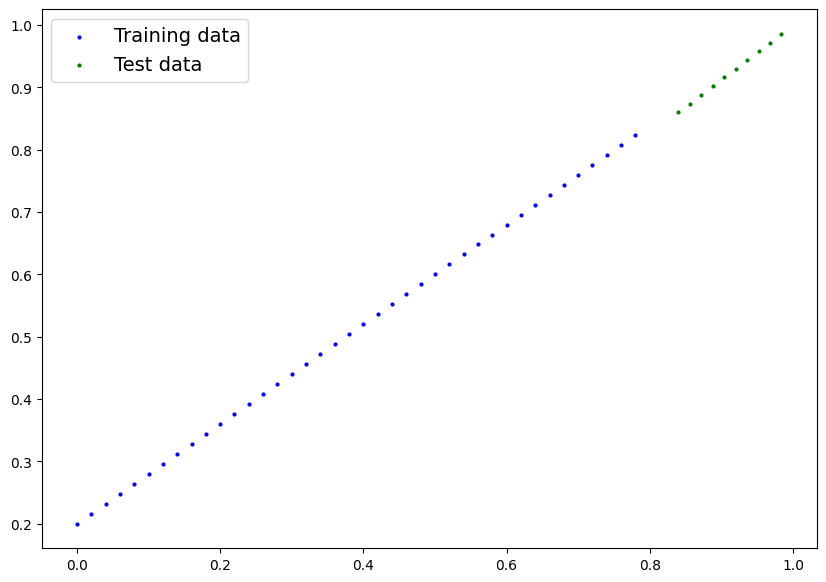

In [37]:
# Plot the data
plot_predictions(X_train,y_train,y_test)

In [38]:
## building a pytorch linear model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self,X:torch.Tensor) -> torch.Tensor:
        return self.weight * self.X + self.bias

In [39]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                     out_features=1)

    def forward(self,X:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(X)

## set module seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [40]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [41]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [42]:
# training part

#setup loss function
loss_fn = nn.L1Loss()

#setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [43]:
# training loop
torch.manual_seed(42)

epochs = 200 
# put data on the target device 
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_preds = model_1(X_test)

        test_loss = loss_fn(test_preds,y_test)

    if epoch % 10 == 0:
         print(f'Epoch:{epoch} | Loss: {loss} | Test_loss: {test_loss}')       

Epoch:0 | Loss: 0.6161779165267944 | Test_loss: 0.5849762558937073
Epoch:10 | Loss: 0.5009680986404419 | Test_loss: 0.45026642084121704
Epoch:20 | Loss: 0.3857581913471222 | Test_loss: 0.3155565857887268
Epoch:30 | Loss: 0.2705483138561249 | Test_loss: 0.180846706032753
Epoch:40 | Loss: 0.15533843636512756 | Test_loss: 0.046136897057294846
Epoch:50 | Loss: 0.05875825881958008 | Test_loss: 0.06886561214923859
Epoch:60 | Loss: 0.04580378159880638 | Test_loss: 0.09473040699958801
Epoch:70 | Loss: 0.041819483041763306 | Test_loss: 0.09405827522277832
Epoch:80 | Loss: 0.03831038996577263 | Test_loss: 0.08853326737880707
Epoch:90 | Loss: 0.034879546612501144 | Test_loss: 0.08094760775566101
Epoch:100 | Loss: 0.03144557774066925 | Test_loss: 0.07267507165670395
Epoch:110 | Loss: 0.028006771579384804 | Test_loss: 0.06440252810716629
Epoch:120 | Loss: 0.024577612057328224 | Test_loss: 0.056816864758729935
Epoch:130 | Loss: 0.021141953766345978 | Test_loss: 0.04854437708854675
Epoch:140 | Loss: 

In [44]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [45]:
weight,bias

(0.8, 0.2)

In [46]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds       

tensor([[0.8484],
        [0.8644],
        [0.8804],
        [0.8964],
        [0.9123],
        [0.9283],
        [0.9443],
        [0.9603],
        [0.9762],
        [0.9922]], device='cuda:0')

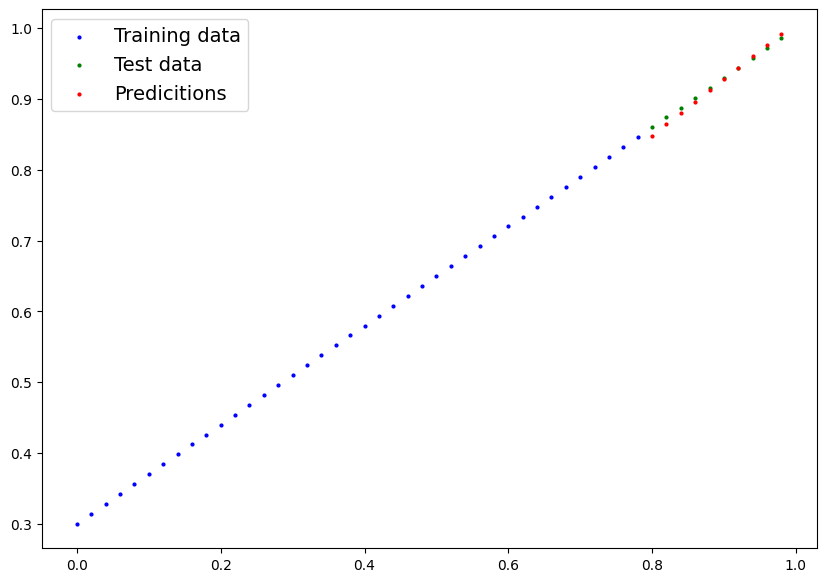

In [47]:
plot_predictions(predictions=y_preds.cpu())

In [49]:
# saving our Pytorch model
from pathlib import Path

#1.create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True) 

#2. Create mdoel save path
MODEL_NAME = 'model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

#3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models/model_1.pth


In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [51]:
#load Model
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [52]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [53]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [ ]:
# evaluate loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds ==     